In [2]:
%store -r X_small y

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import tree

### Decision Tree Clasifier

In [3]:
X_small.shape

(85500, 50)

In [43]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

time_res = []
average_scores = []
criterions = ['gini', 'entropy', 'log_loss']

In [44]:
for criterion in criterions:
    accuracy_scores = []
    
    start_time = time.time()
    for i, (train_index, test_index) in enumerate(kf.split(X_small, y)):
        print(f'{criterion} {i}/{n_splits}', end='\r')
        X_train, X_test = X_small[train_index], X_small[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = DecisionTreeClassifier(criterion=criterion)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
    elapsed_time = time.time() - start_time
    time_res.append(elapsed_time)
    print(f'{criterion} - Done', end='\r')
    print('\n')
    
    average_scores.append(np.mean(accuracy_scores))

gini - Done

entropy - Done

log_loss - Done



In [46]:
time_res

[66.45087909698486, 49.46543622016907, 49.91943287849426]

Text(0.5, 1.0, 'Decision Tree')

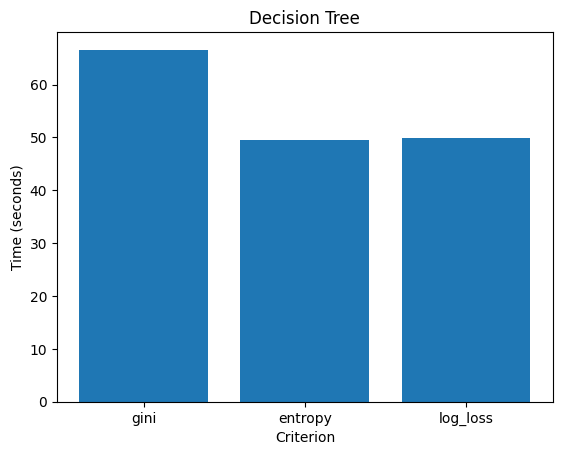

In [36]:
plt.bar(criterions, time_res)

plt.xlabel('Criterion')
plt.ylabel('Time (seconds)')
plt.title('Decision Tree')

### Baseline Model

In [27]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracy_scores = []

In [32]:
start_time = time.time()
for i, (train_index, test_index) in enumerate(kf.split(X_small, y)):
    print(f'{criterion} {i}/{n_splits}', end='\r')
    X_train, X_test = X_small[train_index], X_small[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    
elapsed_time = time.time() - start_time
print(elapsed_time)

66.41020703315735


Text(0.5, 1.0, 'Decision Tree')

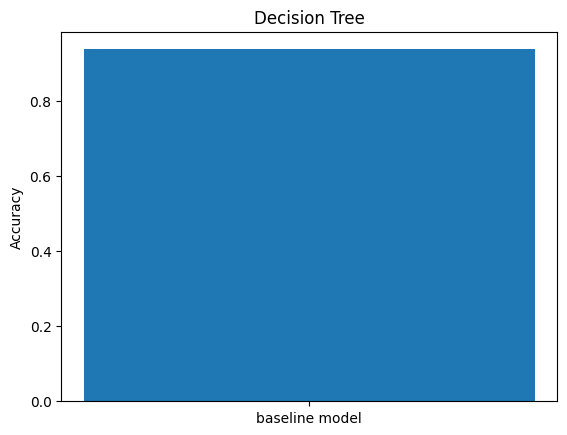

In [29]:
plt.bar(['baseline model'], np.mean(accuracy_scores))

plt.ylabel('Accuracy')
plt.title('Decision Tree')

In [30]:
np.mean(accuracy_scores)

0.9372397660818713

In [41]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=clf.feature_names_in_, class_names=clf.target_names, filled=True)
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_names_in_'

<Figure size 1000x800 with 0 Axes>